<a href="https://colab.research.google.com/github/chaandini2001/intro-ml-course-winter2025/blob/main/Project_Phase2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Data**

Data Source: TMU DM+Complic+Med Category 808K Jan 2025 R1.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import warnings
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import io

#warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Data/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv')

Mounted at /content/drive


<ipython-input-2-c0e5fc0962d8>:18: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv')


In [3]:
#Ensuring data was imported and displayed correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample(5)

Age_at_Exam     Sex    sBP    sBP_Date    BMI    BMI_Date   LDL  \
458393           64  Female  146.0  2004-03-03  29.60  2003-11-04  2.80   
365536           61    Male  124.0  2009-02-26  27.00  2009-02-26  2.81   
3680             80  Female  113.0  2014-08-27  17.99  2014-08-27  2.96   
622536           55  Female  112.0  2010-08-20  25.68  2010-08-24  5.32   
278732           40  Female  130.0  2012-04-16  37.20  2012-04-16  2.57   

          LDL_Date   HDL    HDL_Date  A1c    A1c_Date    TG     TG_Date  FBS  \
458393  2004-01-26  0.99  2004-01-26  NaN         NaN  2.43  2004-01-26  5.4   
365536  2009-03-16  1.03  2009-03-16  NaN         NaN  2.10  2009-03-16  5.5   
3680    2014-08-28  1.27  2014-08-28  6.1  2014-08-28  3.34  2014-08-28  5.3   
622536  2010-08-14  1.41  2010-08-14  NaN         NaN  1.92  2010-08-20  9.0   
278732  2012-07-10  1.16  2012-07-10  5.7  2012-07-10  1.15  2012-07-10  6.2   

          FBS_Date  Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes  \
458393  2004-04-30               4.89                 2004-01-26         0   
365536  2009-03-16               4.81                 2009-03-16         0   
3680    2014-08-28               5.75                 2014-08-28         0   
622536  2010-08-20               7.64                 2010-08-14         1   
278732  2012-07-10               4.25                 2012-07-10         0   

        Depression Depression_OnsetDate  HTN HTN_OnsetDate  OA OA_OnsetDate  \
458393           1           2006-10-13    1    2004-09-15   1   2003-11-04   
365536           0                  NaN    0           NaN   1   2008-07-24   
3680             0                  NaN    0           NaN   1   2014-06-13   
622536           0                  NaN    1    2007-11-20   1   2012-11-27   
278732           1           2007-01-18    0           NaN   0          NaN   

        COPD   COPD_Date        Patient_ID DM_OnsetDate  \
458393     0         NaN  2001000000032060          NaN   
365536     0         NaN  1002000000186945          NaN   
3680       1  2014-06-13  4001000000308497          NaN   
622536     0         NaN  8001000807052511   2010-01-12   
278732     0         NaN  1001000000082837          NaN   

       DM_Onset_Revised_1YrPrior  [Amputation) [Amputation_Date]  [Anxiety)  \
458393                       NaN           NaN               NaN        NaN   
365536                       NaN           NaN               NaN        NaN   
3680                         NaN           NaN               NaN        NaN   
622536                2009-01-12           NaN               NaN        NaN   
278732                       NaN           0.0               NaN        1.0   

       [Anxiety_Date]  [Arrhythmia) [Arrhythmia_Date]  [AtrialFibrillation)  \
458393            NaN           NaN               NaN                   NaN   
365536            NaN           NaN               NaN                   NaN   
3680              NaN           NaN               NaN                   NaN   
622536            NaN           NaN               NaN                   NaN   
278732     2009-05-15           0.0               NaN                   0.0   

       [AtrialFibrillation_Date]  [Blindness) [Blindness_Date]  [CABG)  \
458393                       NaN          NaN              NaN     NaN   
365536                       NaN          NaN              NaN     NaN   
3680                         NaN          NaN              NaN     NaN   
622536                       NaN          NaN              NaN     NaN   
278732                       NaN          0.0              NaN     0.0   

       [CABG_Date]  [CAD) [CAD_Date]  [Cancer) [Cancer_Date]  \
458393         NaN    NaN        NaN       NaN           NaN   
365536         NaN    NaN        NaN       NaN           NaN   
3680           NaN    NaN        NaN       NaN           NaN   
622536         NaN    NaN        NaN       NaN           NaN   
278732         NaN    0.0        NaN       1.0    2011-01-25  

#**Data Preparation**

Filtering data to only include patients diabetes

In [6]:
patients_with_diabetes = df.loc[df["Diabetes"] == 1, "Patient_ID"].dropna().unique()
df_diabetes = df[df["Patient_ID"].isin(list(patients_with_diabetes))]
df_diabetes.shape

(234464, 175)

Creating target variable: patients with anxiety/depression/both

In [7]:
df_diabetes = df_diabetes.copy()
df_diabetes["Has_Any_Psych_Condition"] = (
    (df_diabetes["[Anxiety)"] == 1) |
    (df_diabetes["Depression"] == 1)
).astype(int)

Filtering for last record of each patient

In [8]:
df_last_record = df_diabetes.sort_values(by="sBP_Date", ascending=False).drop_duplicates(subset="Patient_ID", keep="first")
df_last_record.head()

Age_at_Exam     Sex    sBP    sBP_Date        BMI    BMI_Date   LDL  \
705217           64  Female  126.0  2015-06-30  27.548209  2014-12-03  3.19   
788076           85  Female  116.0  2015-06-30  29.536266  2015-06-30  1.89   
588866           69  Female  149.0  2015-06-30  35.100000  2015-06-11  1.72   
699639           62    Male  107.0  2015-06-30  30.000000  2015-06-30  1.48   
710503           82  Female  135.0  2015-06-30  39.000000  2014-12-04  2.02   

          LDL_Date   HDL    HDL_Date  A1c    A1c_Date    TG     TG_Date  FBS  \
705217  2015-05-29  1.99  2015-05-29  6.5  2015-05-29  0.80  2015-05-29  5.7   
788076  2015-04-08  0.86  2015-04-08  6.4  2015-04-08  1.55  2015-06-30  6.0   
588866  2015-06-01  1.97  2015-06-01  5.9  2015-06-01  1.97  2015-06-01  6.5   
699639  2015-04-08  0.92  2015-04-08  6.7  2015-06-24  0.93  2015-04-08  5.2   
710503  2015-05-25  1.20  2015-05-25  7.3  2015-05-25  0.96  2015-05-25  7.9   

          FBS_Date  Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes  \
705217  2015-05-29               5.54                 2015-05-29         1   
788076  2015-06-30               3.48                 2015-04-08         1   
588866  2015-06-01               4.59                 2015-06-01         1   
699639  2015-06-24               2.82                 2015-04-08         1   
710503  2015-05-25               3.66                 2015-05-25         1   

        Depression Depression_OnsetDate  HTN HTN_OnsetDate  OA OA_OnsetDate  \
705217           0                  NaN    0           NaN   0          NaN   
788076           0                  NaN    1    2006-05-31   1   2010-01-20   
588866           1           2012-11-12    1    2012-10-29   0          NaN   
699639           0                  NaN    0           NaN   0          NaN   
710503           0                  NaN    1    2009-08-17   1   2009-05-11   

        COPD COPD_Date        Patient_ID DM_OnsetDate  \
705217     0       NaN  4001000000244672   2009-06-05   
788076     0       NaN  4001000000027445   2006-11-21   
588866     0       NaN  4001000000441126   2014-04-04   
699639     0       NaN  4001000000236580   2009-08-24   
710503     0       NaN  4001000000246953   2009-08-10   

       DM_Onset_Revised_1YrPrior  [Amputation) [Amputation_Date]  [Anxiety)  \
705217                2008-06-05           NaN               NaN        NaN   
788076                2005-11-21           0.0               NaN        0.0   
588866                2013-04-04           NaN               NaN        NaN   
699639                2008-08-24           NaN               NaN        NaN   
710503                2008-08-10           NaN               NaN        NaN   

       [Anxiety_Date]  [Arrhythmia) [Arrhythmia_Date]  [AtrialFibrillation)  \
705217            NaN           NaN               NaN                   NaN   
788076            NaN           0.0               NaN                   0.0   
588866            NaN           NaN               NaN                   NaN   
699639            NaN           NaN               NaN                   NaN   
710503            NaN           NaN               NaN                   NaN   

       [AtrialFibrillation_Date]  [Blindness) [Blindness_Date]  [CABG)  \
705217                       NaN          NaN              NaN     NaN   
788076                       NaN          0.0              NaN     1.0   
588866                       NaN          NaN              NaN     NaN   
699639                       NaN          NaN              NaN     NaN   
710503                       NaN          NaN              NaN     NaN   

       [CABG_Date]  [CAD) [CAD_Date]  [Cancer) [Cancer_Date]  \
705217         NaN    NaN        NaN       NaN           NaN   
788076  2015-01-12    0.0        NaN       1.0    2008-07-11   
588866         NaN    NaN        NaN       NaN           NaN   
699639         NaN    NaN        NaN       NaN           NaN   
710503         NaN    NaN        NaN       NaN    

In [9]:
df_last_record.shape

(25920, 176)

Creating data with only feature and target variables

In [46]:
selected = df_last_record[[
"Age_at_Exam",
"Sex",
"sBP",
#"BMI", removed due to co-linearity
"LDL",
#"HDL", removed due to co-linearity
#"A1c", removed due to co-linearity
"TG",
"FBS",
"b_R1_skin",
"b_R1_foot",
"b_R1_heart",
"b_R1_eye",
"b_R1_cancer",
"b_R1_kidney",
"b_R1_brain",
"b_R1_death",
"b_R1_gastric",
"b_R1_pancreas",
"b_R1_sleep",
"Has_Any_Psych_Condition"
]]

# Assuming your DataFrame is named df
selected = pd.get_dummies(selected, columns=['Sex'], drop_first=True)

selectedD = df_last_record[[
"Age_at_Exam",
"Sex",
"sBP",
#"BMI", removed due to co-linearity
"LDL",
#"HDL", removed due to co-linearity
#"A1c", removed due to co-linearity
"TG",
"FBS",
"b_R1_skin",
"b_R1_foot",
"b_R1_heart",
"b_R1_eye",
"b_R1_cancer",
"b_R1_kidney",
"b_R1_brain",
"b_R1_death",
"b_R1_gastric",
"b_R1_pancreas",
"b_R1_sleep",
"Depression"
]]

# Assuming your DataFrame is named df
selectedD = pd.get_dummies(selectedD, columns=['Sex'], drop_first=True)

##Dealing with Missingness

**Dataset 1:** Anxiety/Depression/Both

In [60]:
# Calculate missingness in each variable
missing_counts = selected.isna().sum()  # Count of missing values per column
total_counts = selected.shape[0]  # Total number of rows (same for all columns)
missing_percentage = (missing_counts / total_counts) * 100  # Convert to percentage

missing_summary = pd.DataFrame({
    #"Missing Values": missing_counts,
    #"Total Values": total_counts,
    "Missing Percentage": missing_percentage
})

# Display summary
print(missing_summary)

                         Missing Percentage
Age_at_Exam                        0.000000
sBP                                0.123457
LDL                                1.107253
TG                                 1.076389
FBS                                0.000000
b_R1_skin                          0.000000
b_R1_foot                          0.000000
b_R1_heart                         0.000000
b_R1_eye                           0.000000
b_R1_cancer                        0.000000
b_R1_kidney                        0.000000
b_R1_brain                         0.000000
b_R1_death                         0.000000
b_R1_gastric                       0.000000
b_R1_pancreas                      0.000000
b_R1_sleep                         0.000000
Has_Any_Psych_Condition            0.000000
Sex_Male                           0.000000


In [61]:
# Imputting missing values
selected = selected.assign(
    sBP=selected["sBP"].fillna(selected["sBP"].mean()),
    LDL=selected["LDL"].fillna(selected["LDL"].mean()),
    TG=selected["TG"].fillna(selected["TG"].median())
)

**Dataset 2:** Depression

In [62]:
# Calculate missingness in each variable
missing_counts = selectedD.isna().sum()  # Count of missing values per column
total_counts = selectedD.shape[0]  # Total number of rows (same for all columns)
missing_percentage = (missing_counts / total_counts) * 100  # Convert to percentage

missing_summary = pd.DataFrame({
    #"Missing Values": missing_counts,
    #"Total Values": total_counts,
    "Missing Percentage": missing_percentage
})

# Display summary
print(missing_summary)

               Missing Percentage
Age_at_Exam                   0.0
sBP                           0.0
LDL                           0.0
TG                            0.0
FBS                           0.0
b_R1_skin                     0.0
b_R1_foot                     0.0
b_R1_heart                    0.0
b_R1_eye                      0.0
b_R1_cancer                   0.0
b_R1_kidney                   0.0
b_R1_brain                    0.0
b_R1_death                    0.0
b_R1_gastric                  0.0
b_R1_pancreas                 0.0
b_R1_sleep                    0.0
Depression                    0.0
Sex_Male                      0.0


In [63]:
# Imputting missing values
selectedD = selectedD.assign(
    sBP=selectedD["sBP"].fillna(selectedD["sBP"].mean()),
    LDL=selectedD["LDL"].fillna(selectedD["LDL"].mean()),
    TG=selectedD["TG"].fillna(selectedD["TG"].median())
)

#**Descriptive Statisitics**


##**Dataset 1:** Anxiety/Depression/Both

In [25]:
# Baseline Characteristics
selected.describe().T

count        mean        std   min     25%     50%  \
Age_at_Exam              25920.0   63.748958  13.487742  18.0   55.00   65.00   
sBP                      25920.0  129.687809  15.732835  40.0  120.00  130.00   
LDL                      25920.0    2.347432   0.935155   0.1    1.66    2.19   
TG                       25920.0    1.702572   1.159176   0.1    1.05    1.46   
FBS                      25920.0    7.352567   2.361077   2.2    5.90    6.80   
b_R1_skin                25920.0    0.032986   0.178604   0.0    0.00    0.00   
b_R1_foot                25920.0    0.013387   0.114929   0.0    0.00    0.00   
b_R1_heart               25920.0    0.051659   0.221342   0.0    0.00    0.00   
b_R1_eye                 25920.0    0.023573   0.151716   0.0    0.00    0.00   
b_R1_cancer              25920.0    0.035725   0.185608   0.0    0.00    0.00   
b_R1_kidney              25920.0    0.014622   0.120036   0.0    0.00    0.00   
b_R1_brain               25920.0    0.015046   0.121739   0.0    0.00    0.00   
b_R1_death               25920.0    0.000270   0.016432   0.0    0.00    0.00   
b_R1_gastric             25920.0    0.024614   0.154949   0.0    0.00    0.00   
b_R1_pancreas            25920.0    0.002508   0.050015   0.0    0.00    0.00   
b_R1_sleep               25920.0    0.020448   0.141528   0.0    0.00    0.00   
Has_Any_Psych_Condition  25920.0    0.215548   0.411210   0.0    0.00    0.00   
Depression               25920.0    0.199653   0.399747   0.0    0.00    0.00   
[Anxiety)                 2761.0    0.265121   0.441478   0.0    0.00    0.00   

                            75%     max  
Age_at_Exam               74.00   90.00  
sBP                      139.00  240.00  
LDL                        2.92    9.09  
TG                         2.06   57.34  
FBS                        8.10   34.10  
b_R1_skin                  0.00    1.00  
b_R1_foot                  0.00    1.00  
b_R1_heart                 0.00    1.00  
b_R1_eye                   0.00    1.00  
b_R1_cancer                0.00    1.00  
b_R1_kidney                0.00    1.00  
b_R1_brain                 0.00    1.00  
b_R1_death                 0.00    1.00  
b_R1_gastric               0.00    1.00  
b_R1_pancreas              0.00    1.00  
b_R1_sleep                 0.00    1.00  
Has_Any_Psych_Condition    0.00    1.00  
Depression                 0.00    1.00  
[Anxiety)                  1.00    1.00

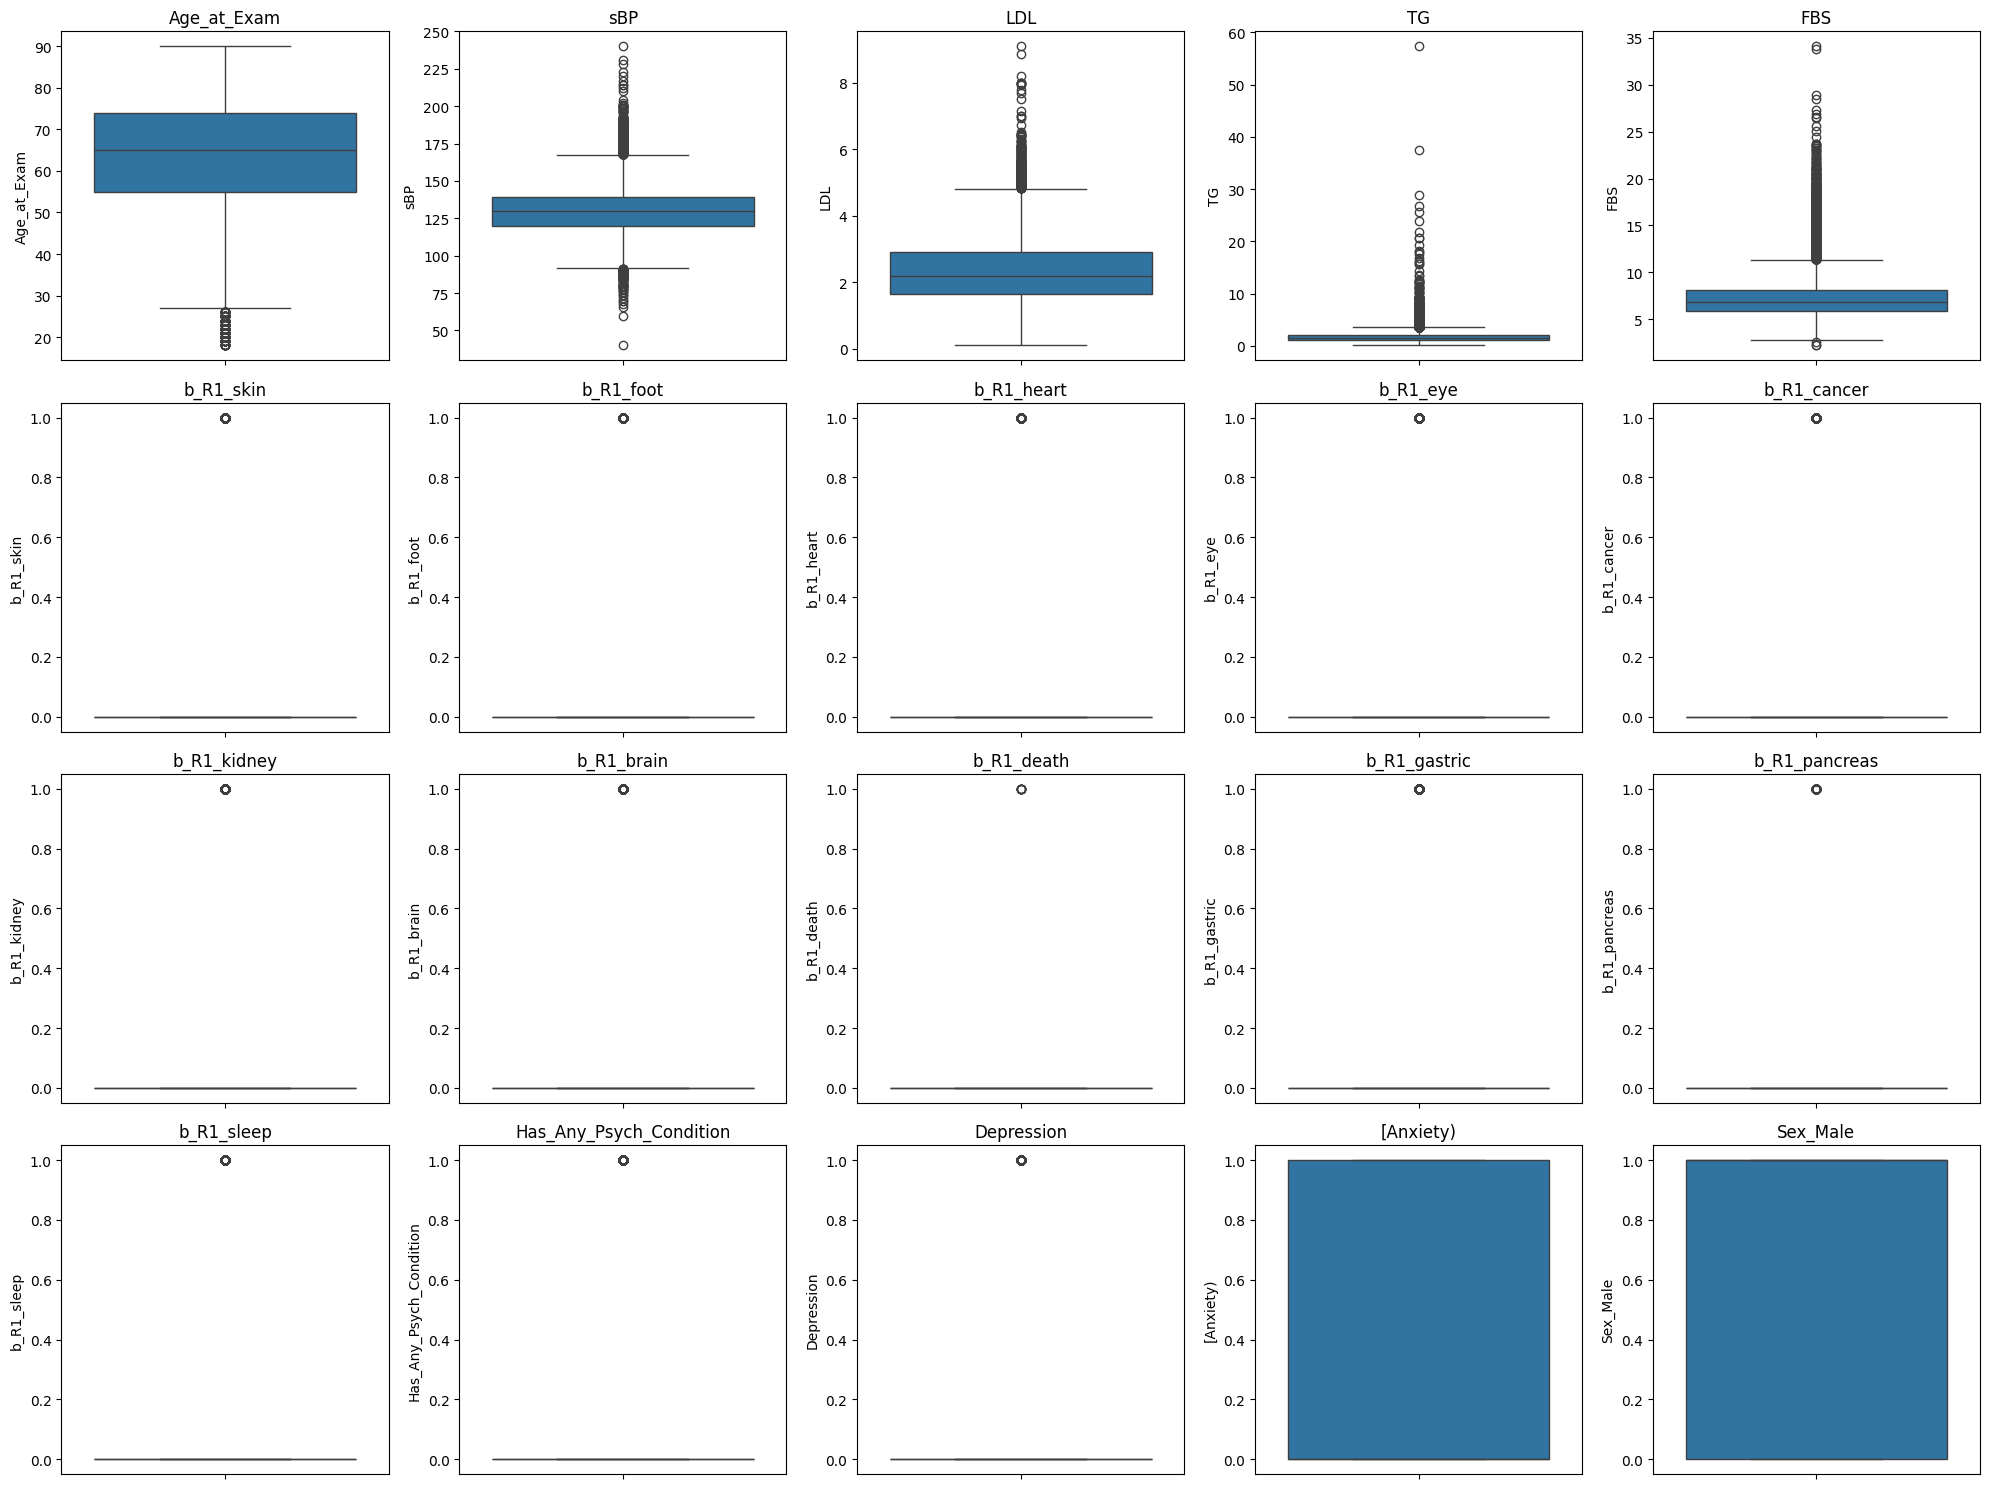

In [26]:
# Box Plot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selected.columns):
    sns.boxplot(y=selected[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

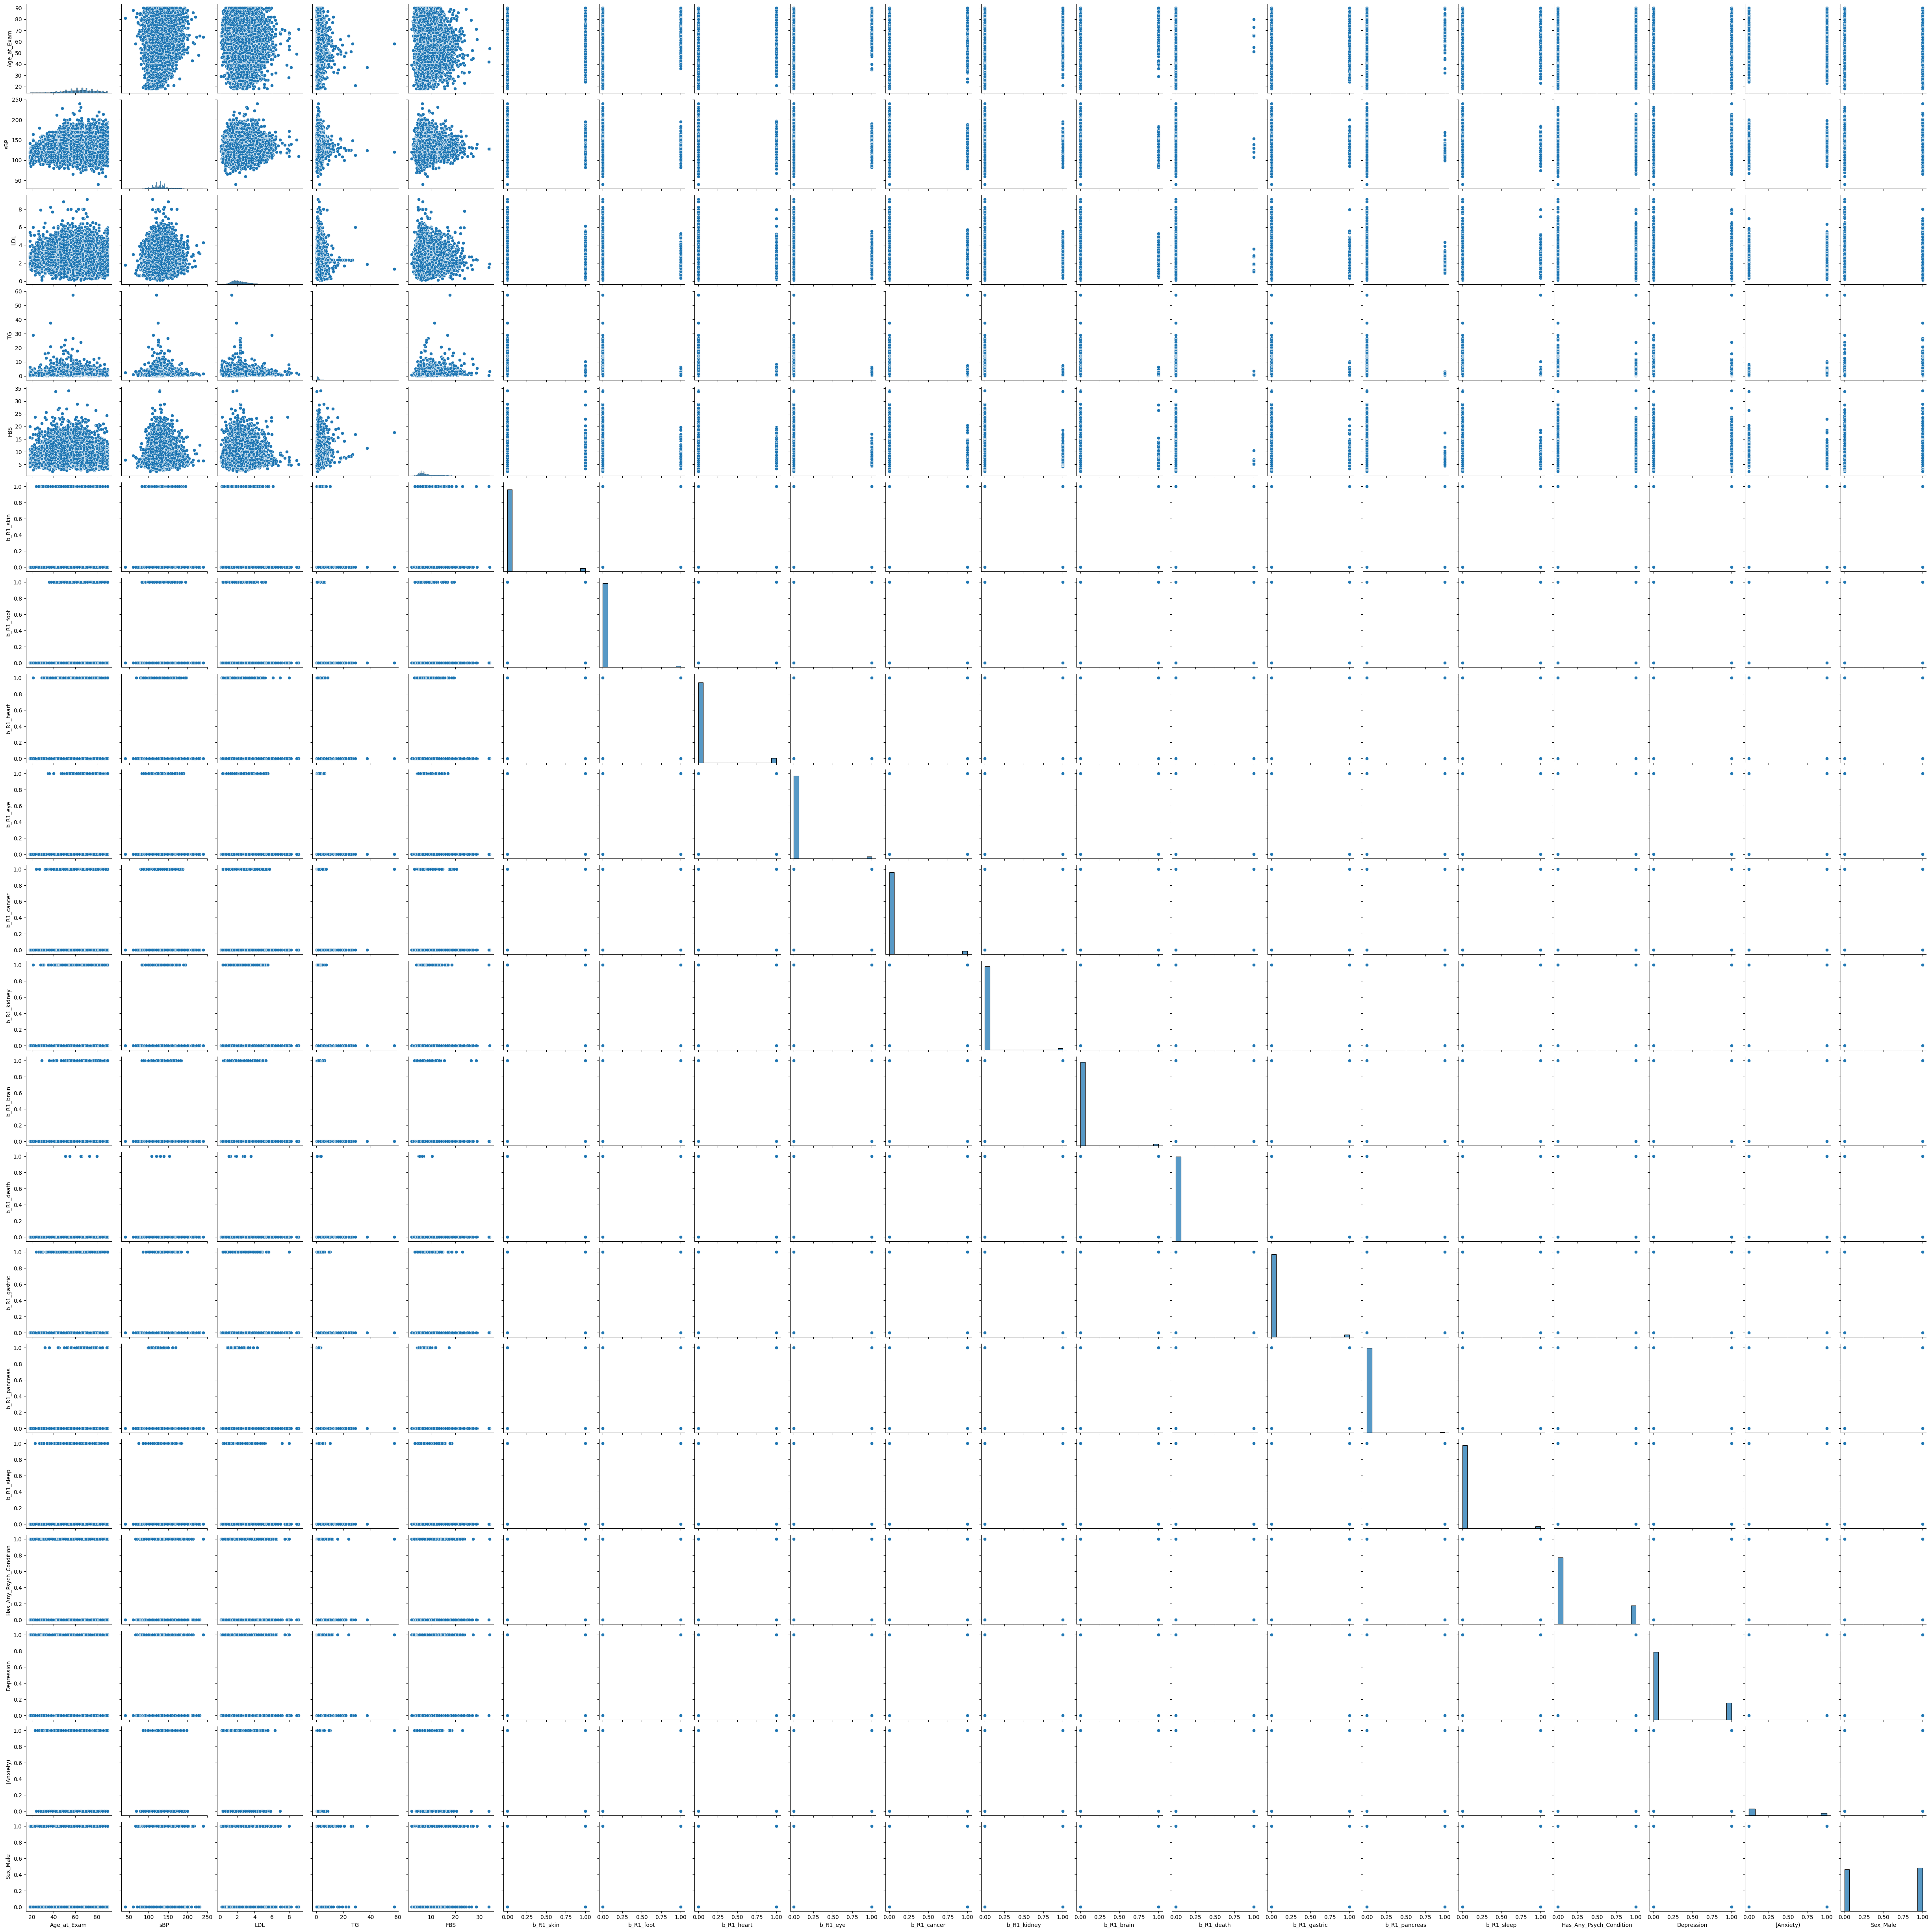

In [27]:
# Scatter Plot Matrix
sns.pairplot(selected)
plt.show()

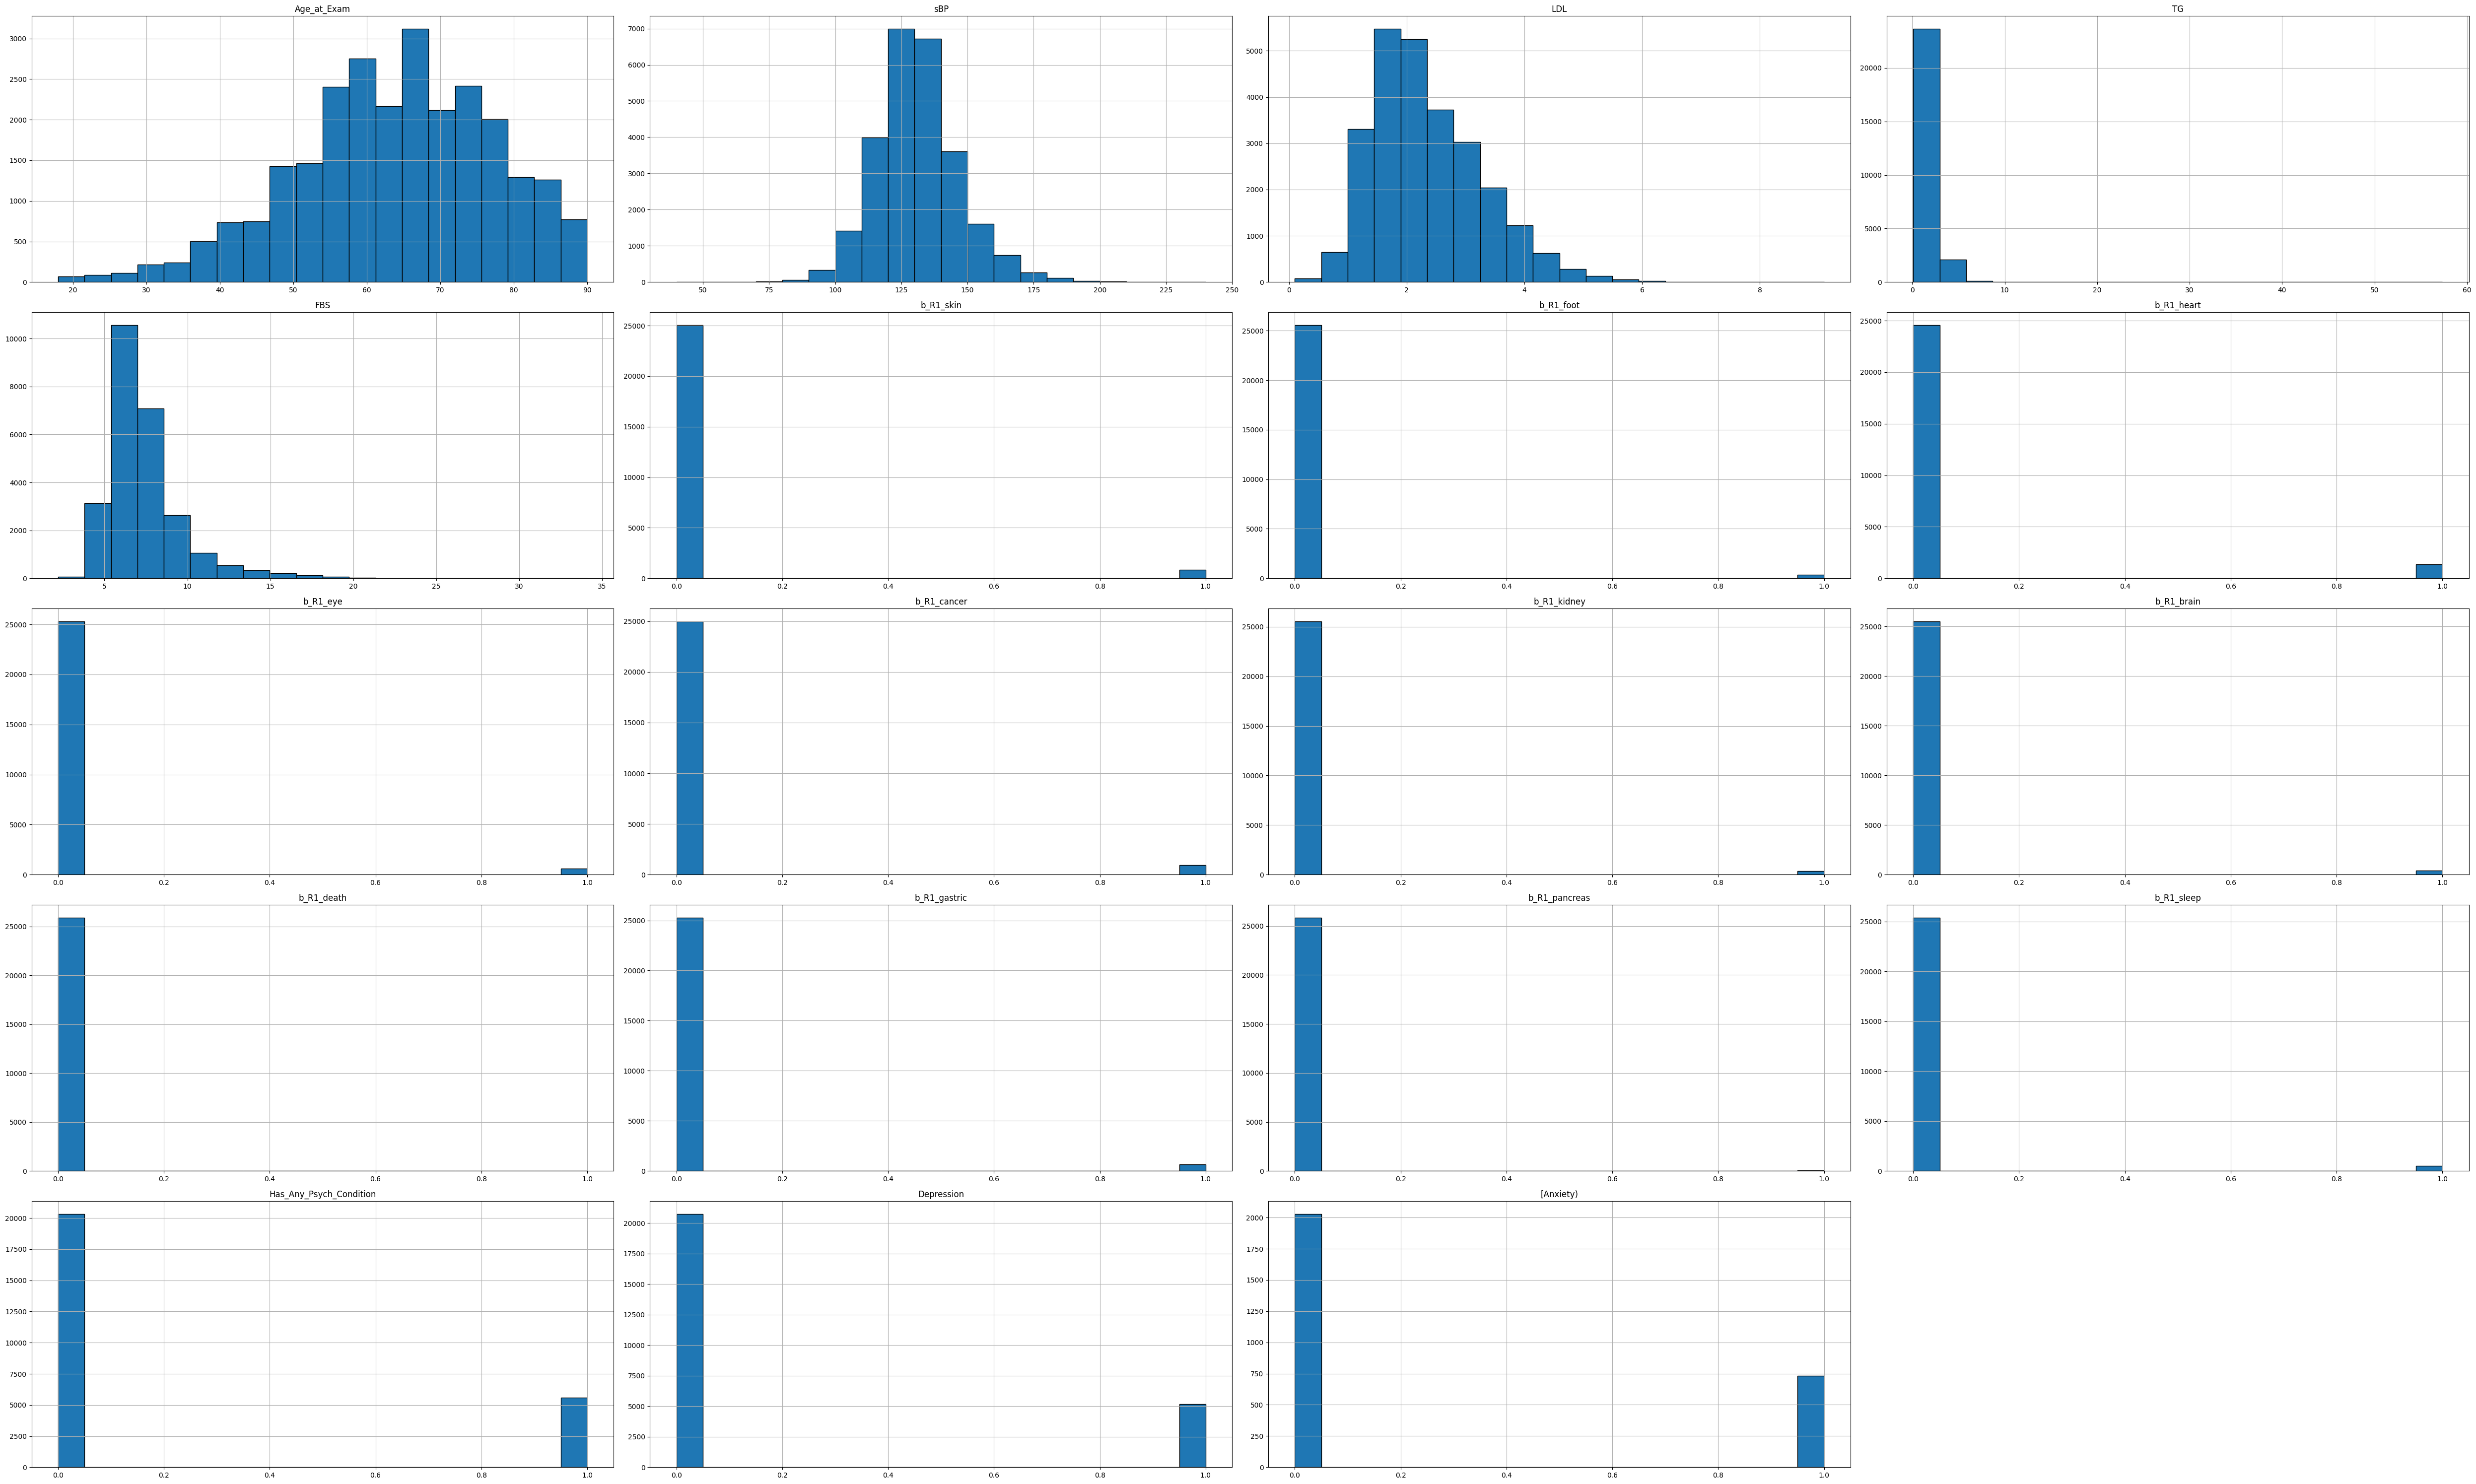

In [28]:
# Histogram
bins = 20
selected.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()

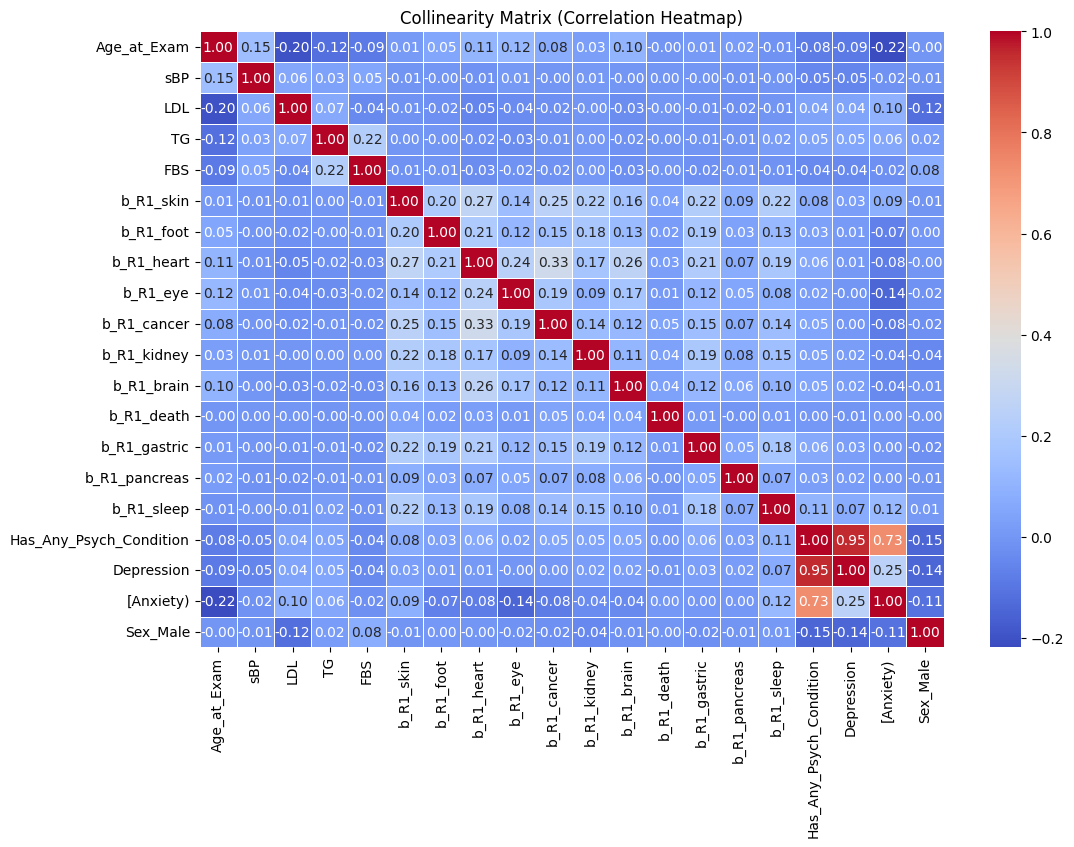

In [29]:
# Compute the correlation matrix
corr_matrix = selected.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

##**Dataset 2:** Depression

In [49]:
# Baseline Characteristics
selectedD.describe().T

count        mean        std   min     25%     50%     75%  \
Age_at_Exam    25920.0   63.748958  13.487742  18.0   55.00   65.00   74.00   
sBP            25920.0  129.687809  15.732835  40.0  120.00  130.00  139.00   
LDL            25920.0    2.347432   0.935155   0.1    1.66    2.19    2.92   
TG             25920.0    1.702572   1.159176   0.1    1.05    1.46    2.06   
FBS            25920.0    7.352567   2.361077   2.2    5.90    6.80    8.10   
b_R1_skin      25920.0    0.032986   0.178604   0.0    0.00    0.00    0.00   
b_R1_foot      25920.0    0.013387   0.114929   0.0    0.00    0.00    0.00   
b_R1_heart     25920.0    0.051659   0.221342   0.0    0.00    0.00    0.00   
b_R1_eye       25920.0    0.023573   0.151716   0.0    0.00    0.00    0.00   
b_R1_cancer    25920.0    0.035725   0.185608   0.0    0.00    0.00    0.00   
b_R1_kidney    25920.0    0.014622   0.120036   0.0    0.00    0.00    0.00   
b_R1_brain     25920.0    0.015046   0.121739   0.0    0.00    0.00    0.00   
b_R1_death     25920.0    0.000270   0.016432   0.0    0.00    0.00    0.00   
b_R1_gastric   25920.0    0.024614   0.154949   0.0    0.00    0.00    0.00   
b_R1_pancreas  25920.0    0.002508   0.050015   0.0    0.00    0.00    0.00   
b_R1_sleep     25920.0    0.020448   0.141528   0.0    0.00    0.00    0.00   
Depression     25920.0    0.199653   0.399747   0.0    0.00    0.00    0.00   

                  max  
Age_at_Exam     90.00  
sBP            240.00  
LDL              9.09  
TG              57.34  
FBS             34.10  
b_R1_skin        1.00  
b_R1_foot        1.00  
b_R1_heart       1.00  
b_R1_eye         1.00  
b_R1_cancer      1.00  
b_R1_kidney      1.00  
b_R1_brain       1.00  
b_R1_death       1.00  
b_R1_gastric     1.00  
b_R1_pancreas    1.00  
b_R1_sleep       1.00  
Depression       1.00

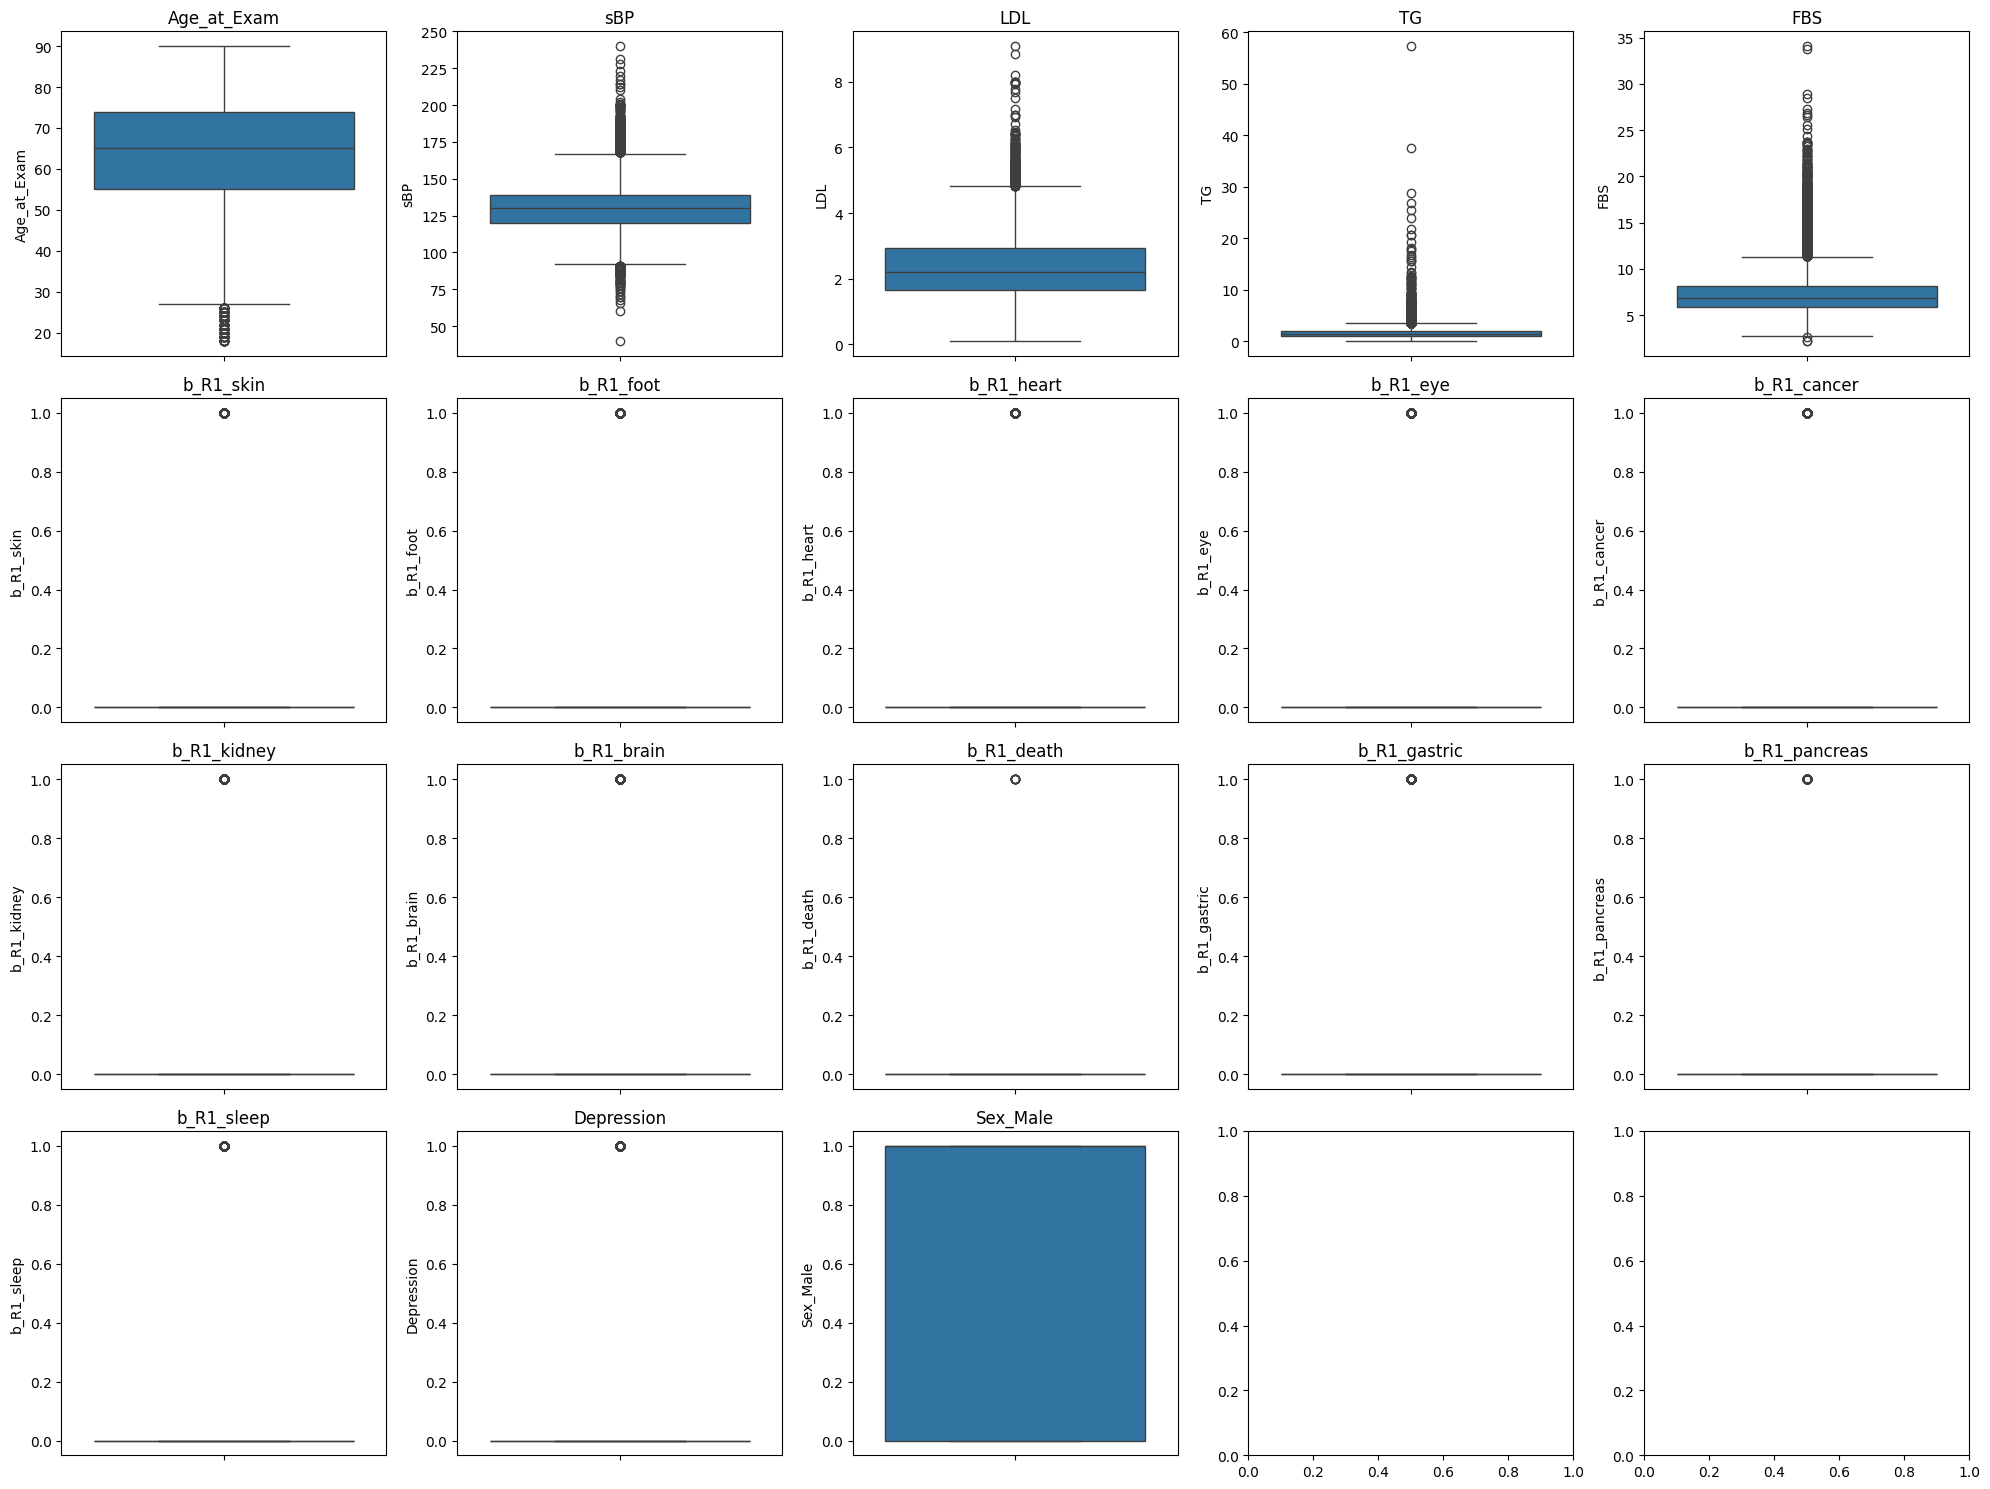

In [50]:
# Box Plot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selectedD.columns):
    sns.boxplot(y=selectedD[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

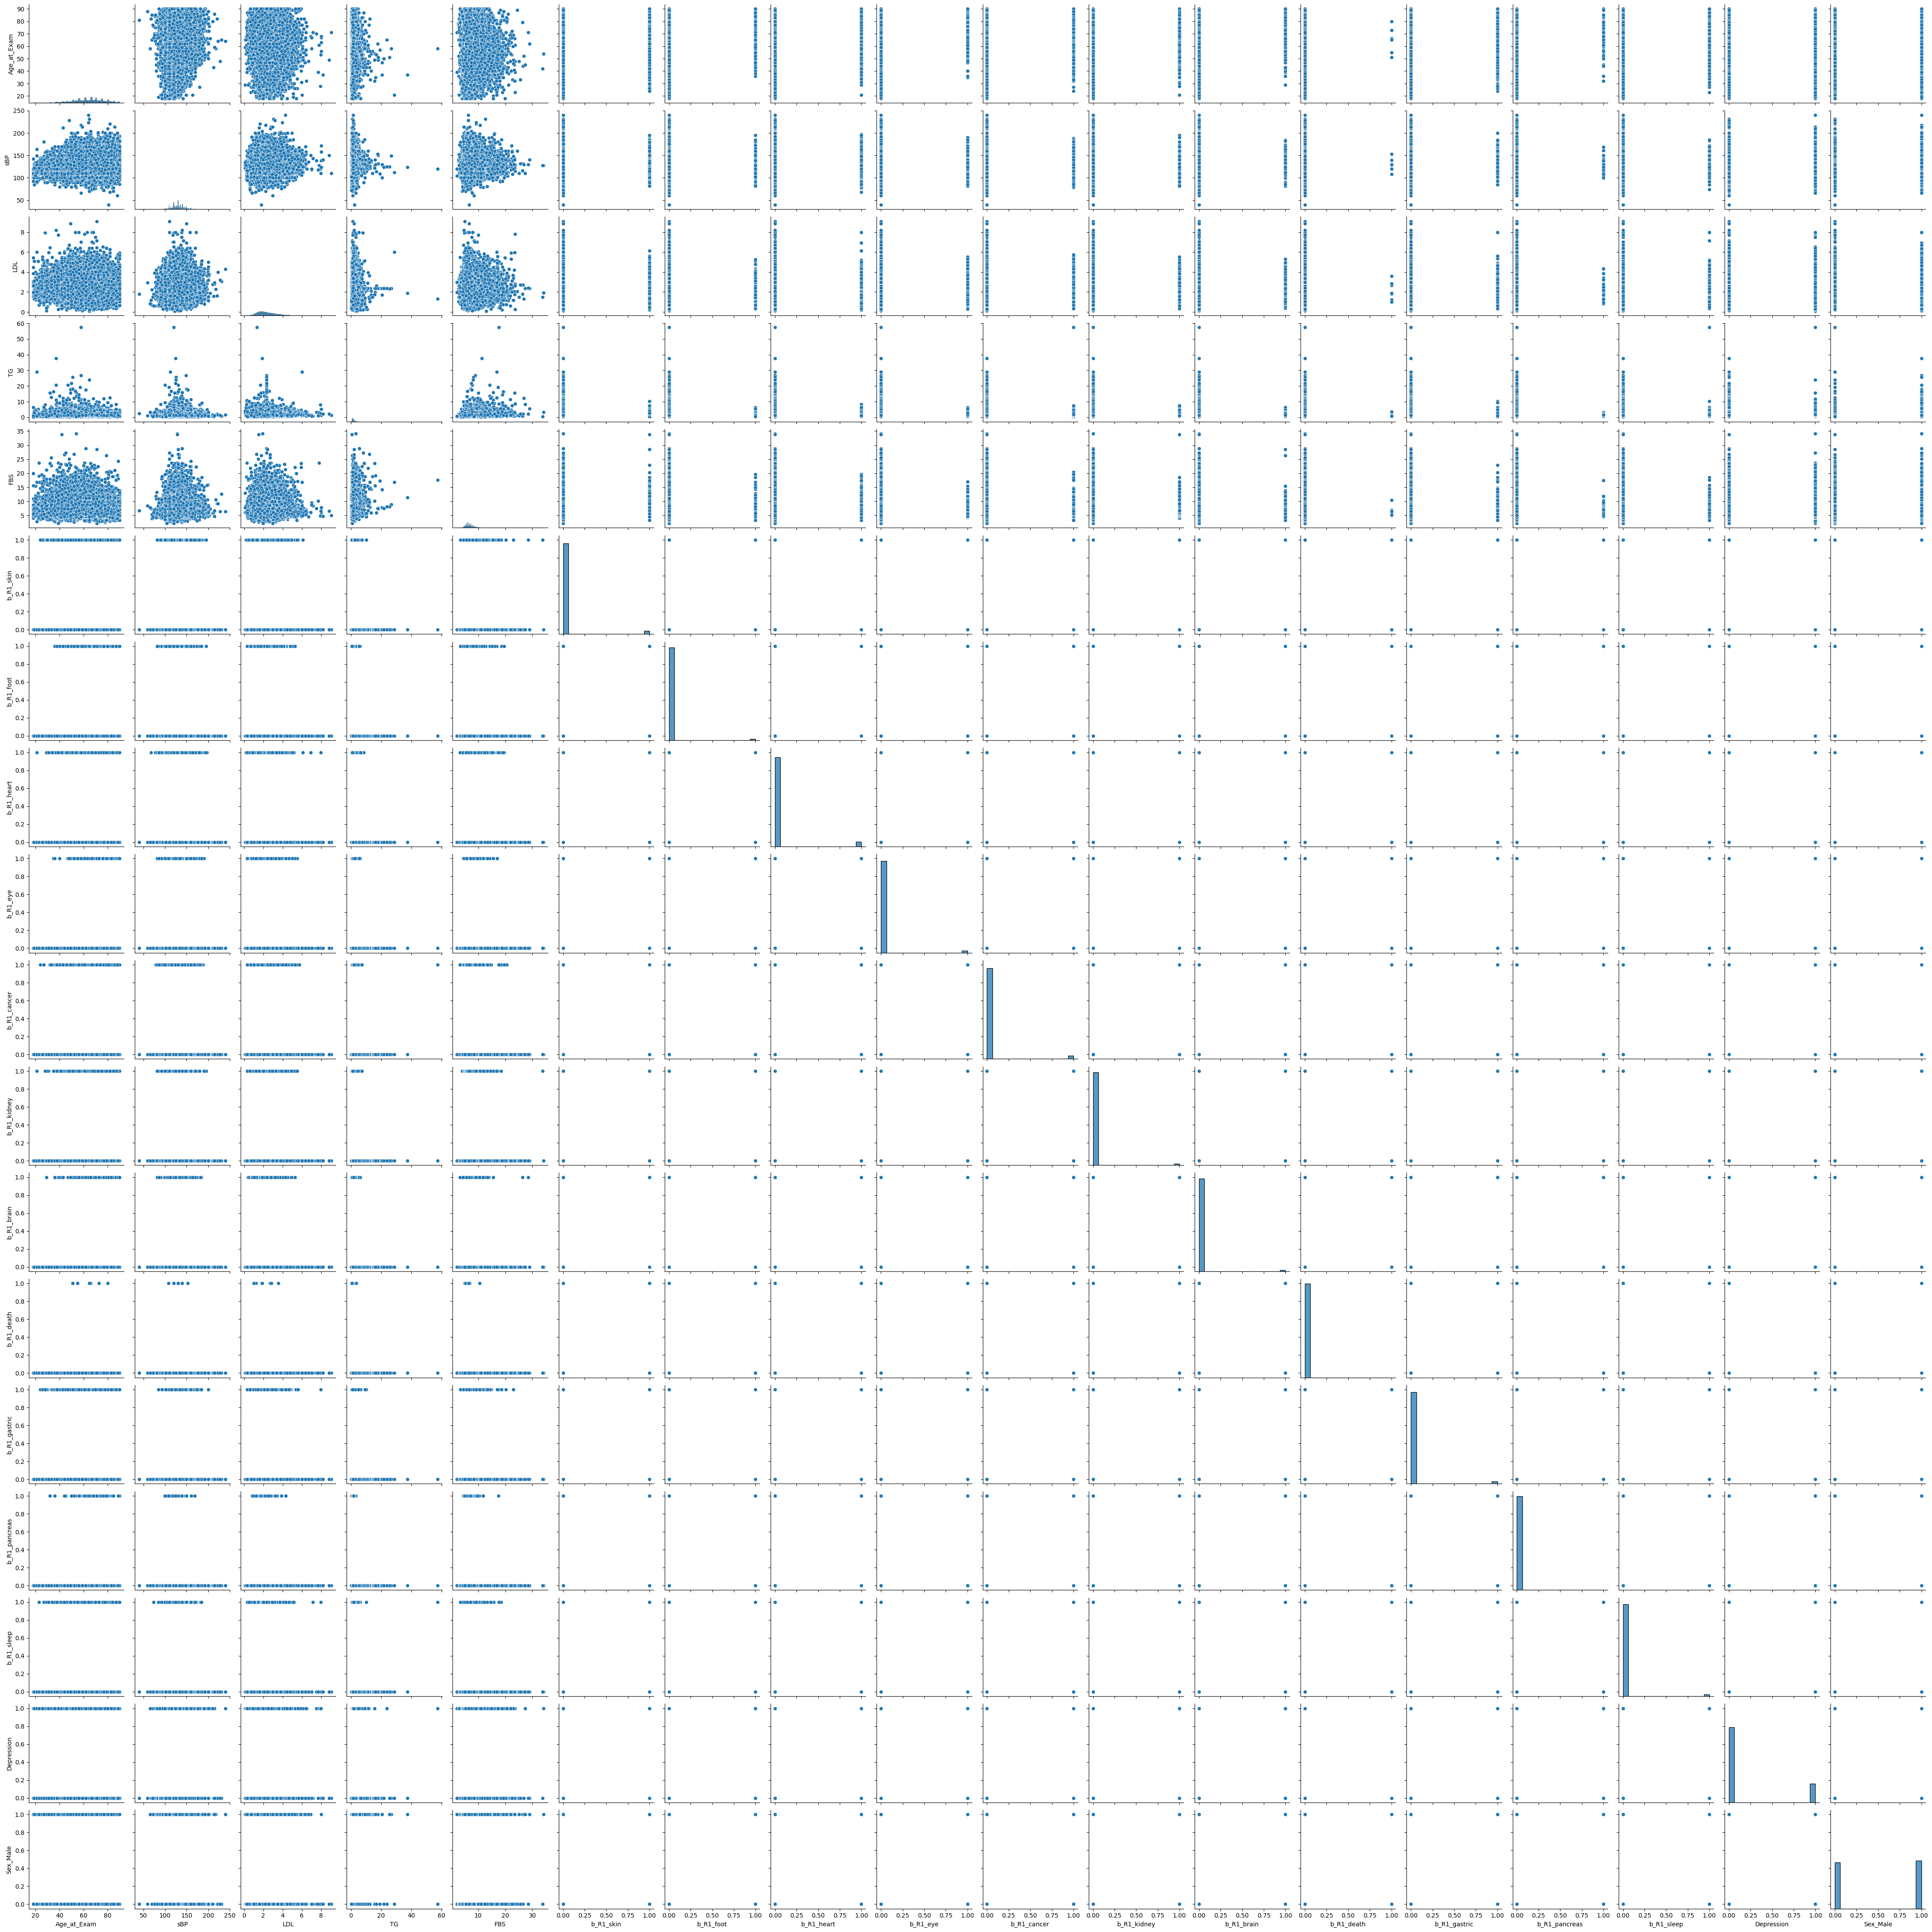

In [51]:
# Scatter Plot Matrix
sns.pairplot(selectedD)
plt.show()

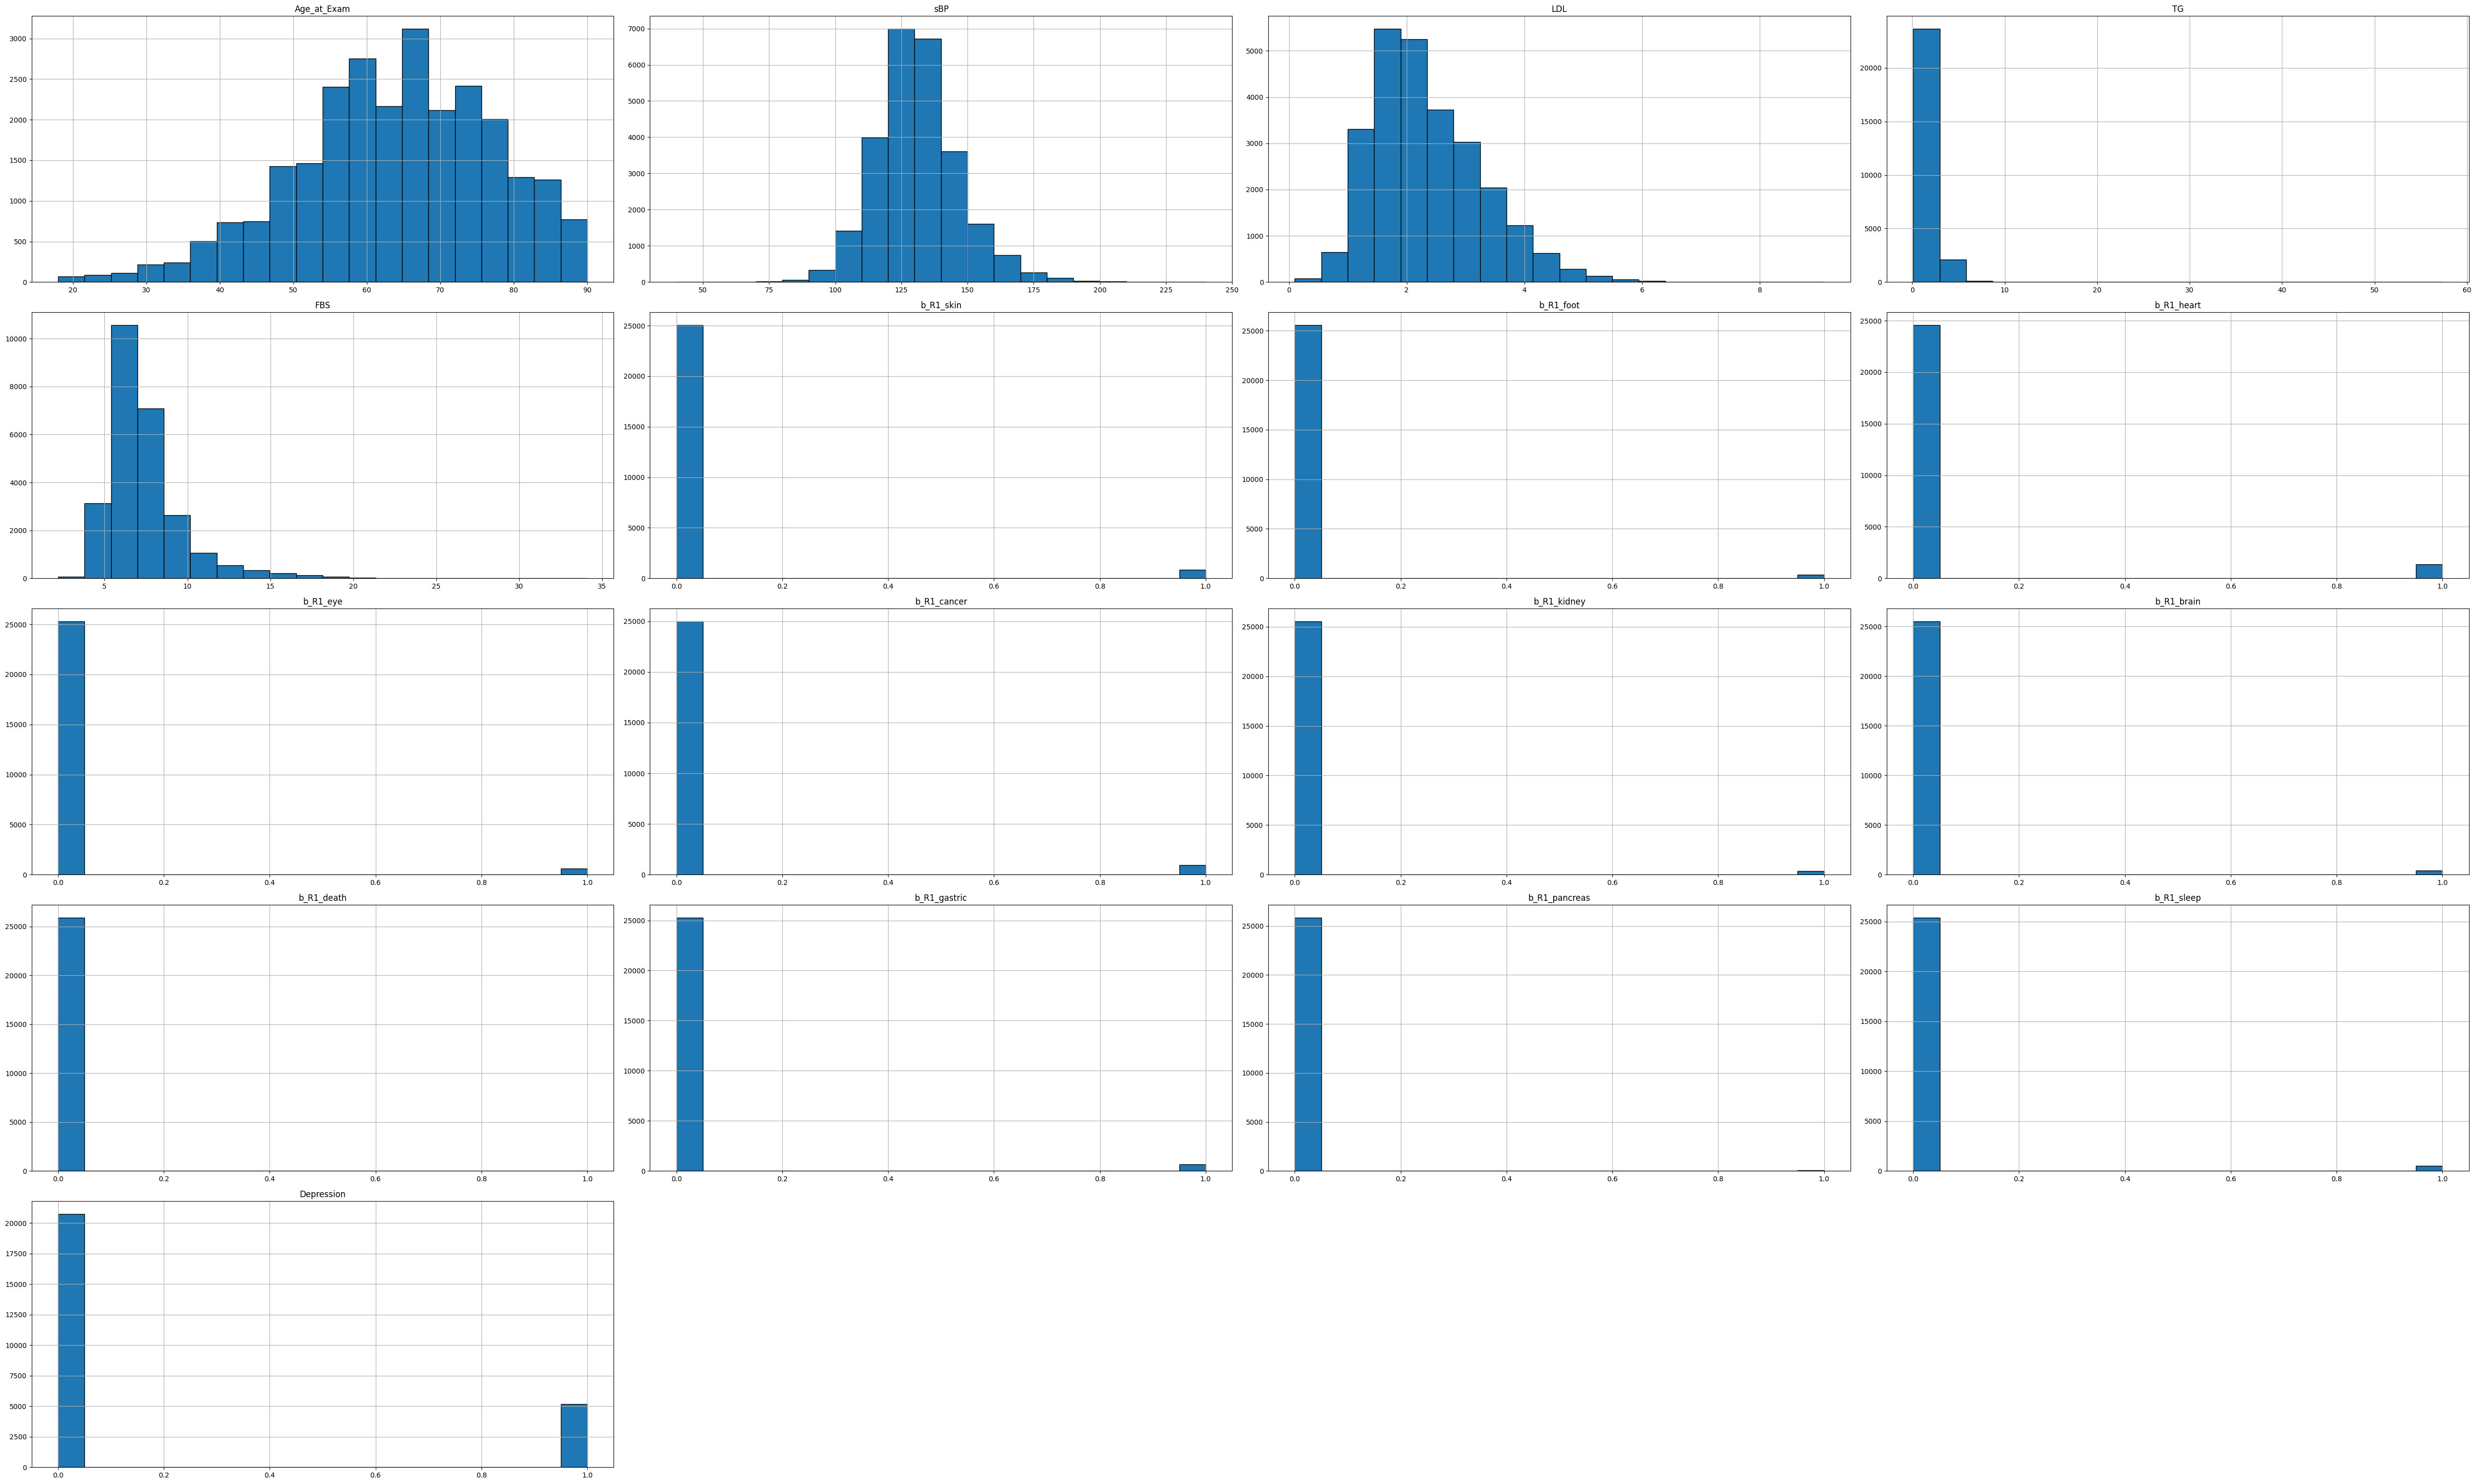

In [52]:
# Histogram
bins = 20
selectedD.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()

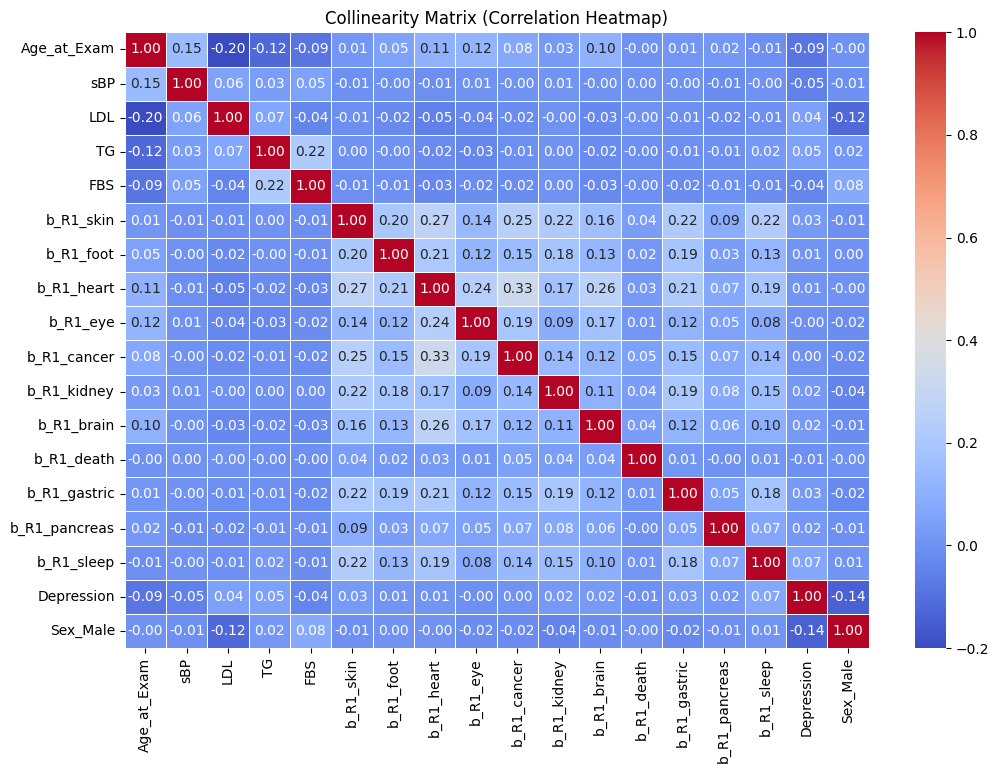

In [53]:
# Compute the correlation matrix
corr_matrix = selectedD.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

#**Logistics Regression**


##**Model 1:** Anxiety/Depression/Both

In [64]:
# Split the data into features and target variable
X = selected.drop('Has_Any_Psych_Condition', axis=1)
y = selected['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [65]:
# Training logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [66]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[2455 1633]
 [ 436  660]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      4088
           1       0.29      0.60      0.39      1096

    accuracy                           0.60      5184
   macro avg       0.57      0.60      0.55      5184
weighted avg       0.73      0.60      0.64      5184



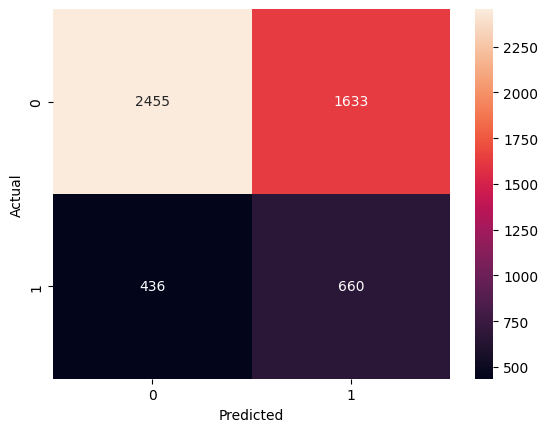

In [67]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [68]:
# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='f1'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.793981   0.684211  0.047445  0.088737  0.520787
1          L1  0.793981   0.684211  0.047445  0.088737  0.520787
2          L2  0.793981   0.684211  0.047445  0.088737  0.520787
3  ElasticNet  0.793981   0.684211  0.047445  0.088737  0.520787
4       Tuned  0.794174   0.693333  0.047445  0.088813  0.520910


##**Model 2:** Depression

In [69]:
# Split the data into features and target variable
X = selectedD.drop('Depression', axis=1)
y = selectedD['Depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [70]:
# Training logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [71]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[2425 1736]
 [ 392  631]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.58      0.70      4161
           1       0.27      0.62      0.37      1023

    accuracy                           0.59      5184
   macro avg       0.56      0.60      0.53      5184
weighted avg       0.74      0.59      0.63      5184



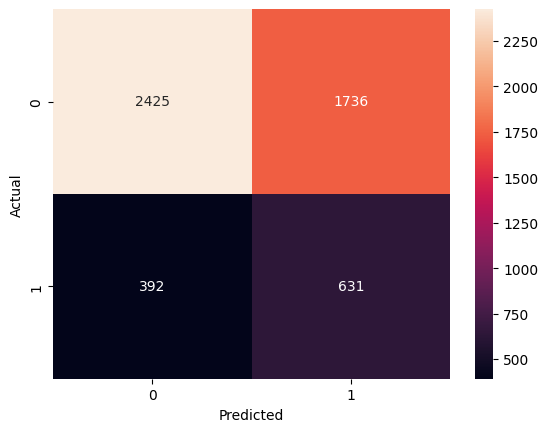

In [72]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [73]:
# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='f1'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.804012   0.620690  0.017595  0.034221  0.507476
1          L1  0.804205   0.642857  0.017595  0.034253  0.507596
2          L2  0.804012   0.620690  0.017595  0.034221  0.507476
3  ElasticNet  0.804012   0.620690  0.017595  0.034221  0.507476
4       Tuned  0.804012   0.620690  0.017595  0.034221  0.507476


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
